In [4]:
%load_ext autoreload
%autoreload 2
%load_ext line_profiler
from spr.nb import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


In [5]:
from spr.data.cxr_tube import get_cxr_activations, get_dp, build_cxr_df

In [2]:
from spr.data.cxr_tube import build_cxr_df, get_dp
df = build_cxr_df.out(load=True)
dp = get_dp(df)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/sabrieyuboglu/code/terra/test_storage_dir/tasks/data/cxr_tube/build_cxr_df/_runs/None/outputs.json'

In [10]:
dict(dp[["image_id", "split"]].items())

{'image_id': NumpyArrayColumn(array(['1.2.2... dtype=object)),
 'split': NumpyArrayColumn(array(['train... dtype=object)),
 'index': ListColumn(['0', '1', '2', '3', '4', '5', ...])}

In [18]:
test = dp.lz[0:10]
test.update(lambda x: {"pmx": 0}, input_columns=["pmx"])


here


,image_id (NumpyArrayColumn),encoded_pixels (NumpyArrayColumn),pmx (NumpyArrayColumn),filepath (NumpyArrayColumn),chest_tube (NumpyArrayColumn),split (NumpyArrayColumn),index (ListColumn),input (ImageColumn),img (ImageColumn)
0,1.2.276.0.7230010.3.1.4.8323329.6904.151787520...,-1,0,/home/common/datasets/cxr-tube/dicom-images-tr...,NaN,train,'0',MedicalVolumeCell([PosixPath('/home/common/dat...,MedicalVolumeCell([PosixPath('/home/common/dat...
1,1.2.276.0.7230010.3.1.4.8323329.13666.15178752...,557374 2 1015 8 1009 14 1002 20 997 26 990 32 ...,0,/home/common/datasets/cxr-tube/dicom-images-tr...,NaN,train,'1',MedicalVolumeCell([PosixPath('/home/common/dat...,MedicalVolumeCell([PosixPath('/home/common/dat...
2,1.2.276.0.7230010.3.1.4.8323329.11028.15178752...,-1,0,/home/common/datasets/cxr-tube/dicom-images-tr...,NaN,train,'2',MedicalVolumeCell([PosixPath('/home/common/dat...,MedicalVolumeCell([PosixPath('/home/common/dat...
3,1.2.276.0.7230010.3.1.4.8323329.10366.15178752...,514175 10 1008 29 994 30 993 32 991 33 990 34 ...,0,/home/common/datasets/cxr-tube/dicom-images-tr...,NaN,train,'3',MedicalVolumeCell([PosixPath('/home/common/dat...,MedicalVolumeCell([PosixPath('/home/common/dat...
4,1.2.276.0.7230010.3.1.4.8323329.10016.15178752...,592184 33 976 58 956 73 941 88 926 102 917 109...,0,/home/common/datasets/cxr-tube/dicom-images-tr...,NaN,train,'4',MedicalVolumeCell([PosixPath('/home/common/dat...,MedicalVolumeCell([PosixPath('/home/common/dat...
5,1.2.276.0.7230010.3.1.4.8323329.11444.15178752...,-1,0,/home/common/datasets/cxr-tube/dicom-images-tr...,NaN,train,'5',MedicalVolumeCell([PosixPath('/home/common/dat...,MedicalVolumeCell([PosixPath('/home/common/dat...
6,1.2.276.0.7230010.3.1.4.8323329.32219.15178751...,-1,0,/home/common/datasets/cxr-tube/dicom-images-tr...,NaN,train,'6',MedicalVolumeCell([PosixPath('/home/common/dat...,MedicalVolumeCell([PosixPath('/home/common/dat...
7,1.2.276.0.7230010.3.1.4.8323329.32395.15178751...,-1,0,/home/common/datasets/cxr-tube/dicom-images-tr...,0.0,test,'7',MedicalVolumeCell([PosixPath('/home/common/dat...,MedicalVolumeCell([PosixPath('/home/common/dat...
8,1.2.276.0.7230010.3.1.4.8323329.10623.15178752...,-1,0,/home/common/datasets/cxr-tube/dicom-images-tr...,NaN,train,'8',MedicalVolumeCell([PosixPath('/home/common/dat...,MedicalVolumeCell([PosixPath('/home/common/dat...
9,1.2.276.0.7230010.3.1.4.8323329.12095.15178752...,-1,0,/home/common/datasets/cxr-tube/dicom-images-tr...,NaN,train,'9',MedicalVolumeCell([PosixPath('/home/common/dat...,MedicalVolumeCell([PosixPath('/home/common/dat...


In [21]:
#test.visible_rows = [0,2,3]
test.update(lambda x: {"pmx": 0}, input_columns=["pmx"])

,pmx (NumpyArrayColumn),index (ListColumn)
0,0,'0'
1,0,'2'
2,0,'3'


In [8]:
def convert_to_png(row: dict):
    row["img"].save(f"image_id.png","PNG")
    return row["image_id"]

dp.map(convert_to_png, columns=["image_id", "img"])

SyntaxError: invalid syntax (<ipython-input-8-6c5220793802>, line 2)

In [27]:
dp = dp.lz[np.where(1 - np.isnan(dp["chest_tube"]))[0]]

In [46]:
cell = act_dp["img"].lz[0]

In [24]:
import clip
clip.load("ViT-B/32", device=0, jit=False)

(CLIP(
   (visual): VisualTransformer(
     (conv1): Conv2d(3, 768, kernel_size=(32, 32), stride=(32, 32), bias=False)
     (ln_pre): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
     (transformer): Transformer(
       (resblocks): Sequential(
         (0): ResidualAttentionBlock(
           (attn): MultiheadAttention(
             (out_proj): _LinearWithBias(in_features=768, out_features=768, bias=True)
           )
           (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
           (mlp): Sequential(
             (c_fc): Linear(in_features=768, out_features=3072, bias=True)
             (gelu): QuickGELU()
             (c_proj): Linear(in_features=3072, out_features=768, bias=True)
           )
           (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
         )
         (1): ResidualAttentionBlock(
           (attn): MultiheadAttention(
             (out_proj): _LinearWithBias(in_features=768, out_features=768, bias=True)
           )
        

In [30]:
#act_dp = get_cxr_activations(
#    dp=dp, 
#    model_path="/home/common/datasets/cxr-tube/models/best_model_target_cxr_val_accuracy.pth"
#)
act_dp = get_cxr_activations.out(run_id=406, load=True)

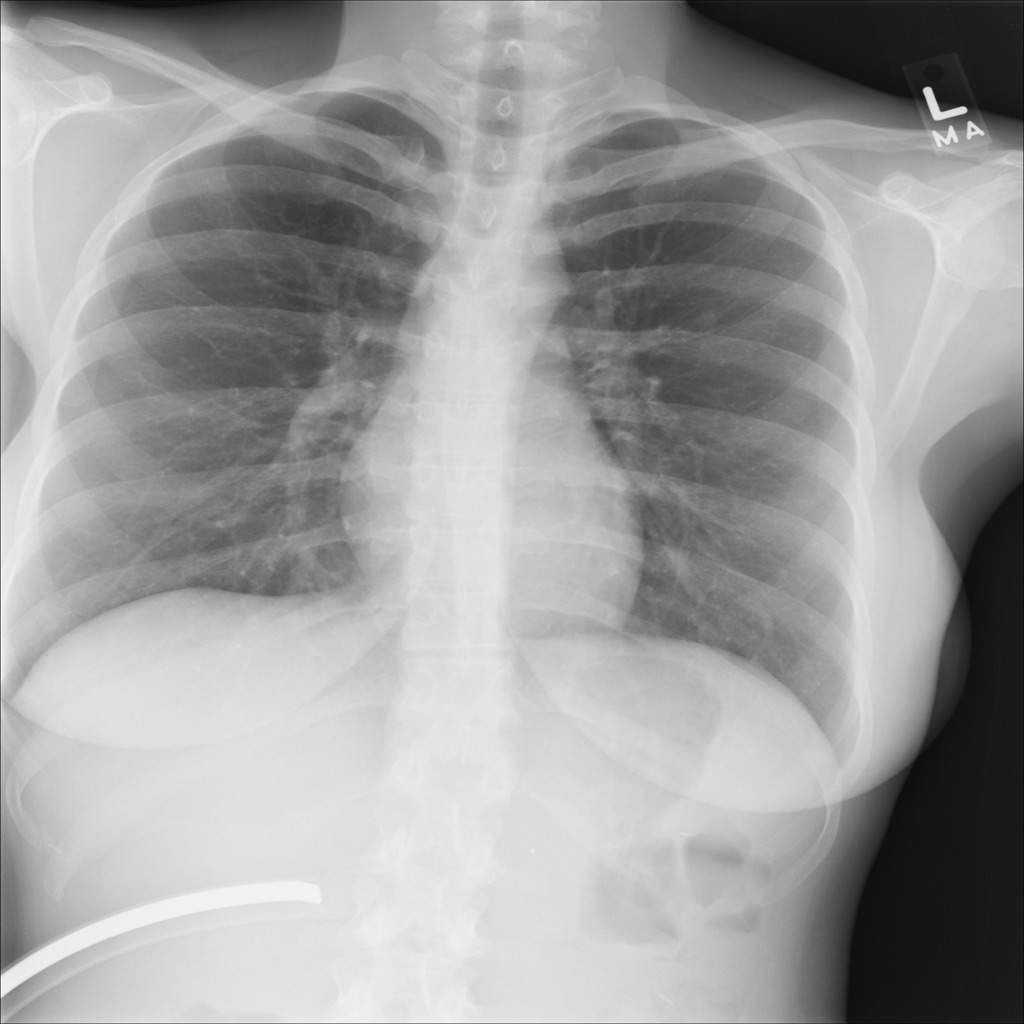

In [11]:
from PIL import Image

Image.open("/home/common/datasets/cxr-tube/forager/test/img_1.2.276.0.7230010.3.1.4.8323329.12084.1517875237.281809.png")

In [12]:
dp

AttributeError: 'DataPanel' object has no attribute '_visible_columns'

In [6]:
from mosaic import ImageColumn
import glob
names = glob.glob("/home/common/datasets/cxr-tube/forager/train/*.png")
img_column = ImageColumn.from_filepaths(filepaths=names)

In [13]:
def test_load(img):
    try: 
        img.get()
    except OSError:
        return {"path": img.filepath, "status": False}
    return {"path": img.filepath, "status": True}
status = img_column.map(test_load, materialize=False, batch_size=1)

ValueError: Map function must return same keys for each batch.